# Julia 型別 (Types) 系統簡介

### 抽象型別參數化

下例是抽象型別 `Pointy` 參數化，而 `Pointy` 有三個子型別，分別代表一維、二維、三維座標型別而有不同的成員。型別階層如下圖：

![](pointy.png)

抽象化型別參數化的宣告語法：`abstract type <<name>>:{T} end`

In [1]:
abstract type Pointy{T} end

In [2]:
struct Point1D{T} <: Pointy{T}
    x::T
end

In [3]:
struct Point2D{T} <: Pointy{T}
    x::T
    y::T
end

In [4]:
struct Point3D{T} <: Pointy{T}
    x::T
    y::T
    z::T
end

函式之引數宣告為抽象型別，在函式內判斷傳入的複合型別為何，並印出傳入的成員值。

透過 `isa()` 函式判斷型別，若型別相同則為 `true`，若不同則為 `false`。

In [5]:
function print_members(p::Pointy)
    if isa(p, Point1D)
        println(p.x)
    elseif isa(p, Point2D)
        println(p.x, " ", p.y)
    else
        println(p.x, " ", p.y, " ", p.z)
    end
end

print_members (generic function with 1 method)

In [6]:
p1 = Point1D(1.0)

Point1D{Float64}(1.0)

In [7]:
p2 = Point2D(1.0, 2.0)

Point2D{Float64}(1.0, 2.0)

In [8]:
p3 = Point3D(1.0, 2.0, 3.0)

Point3D{Float64}(1.0, 2.0, 3.0)

In [9]:
for p in [p1, p2, p3]
    print_members(p)
end

1.0
1.0 2.0
1.0 2.0 3.0


In [10]:
function to3d(p::Pointy)
    if isa(p, Point1D)
        return [p.x, 0, 0]
    elseif isa(p, Point2D)
        return [p.x, p.y, 0]
    else
        return [p.x, p.y, p.z]
    end
end

to3d (generic function with 1 method)

In [11]:
function getx(p::Pointy)
    if isa(p, Point1D)
        return p.x
    elseif isa(p, Point2D)
        return p.x
    else
        return p.x
    end
end

getx (generic function with 1 method)

In [12]:
function gety(p::Pointy)
    if isa(p, Point1D)
        return 0
    elseif isa(p, Point2D)
        return p.y
    else
        return p.y
    end
end

gety (generic function with 1 method)

In [13]:
function getz(p::Pointy)
    if isa(p, Point1D)
        return 0
    elseif isa(p, Point2D)
        return 0
    else
        return p.z
    end
end

getz (generic function with 1 method)

In [14]:
import Pkg
Pkg.add("Plots")

   Updating registry at `~/.juliapro/JuliaPro_v1.4.0-1/registries/JuliaPro`
  Resolving package versions...
   Updating `~/.juliapro/JuliaPro_v1.4.0-1/environments/v1.4/Project.toml`
 [no changes]
   Updating `~/.juliapro/JuliaPro_v1.4.0-1/environments/v1.4/Manifest.toml`
 [no changes]


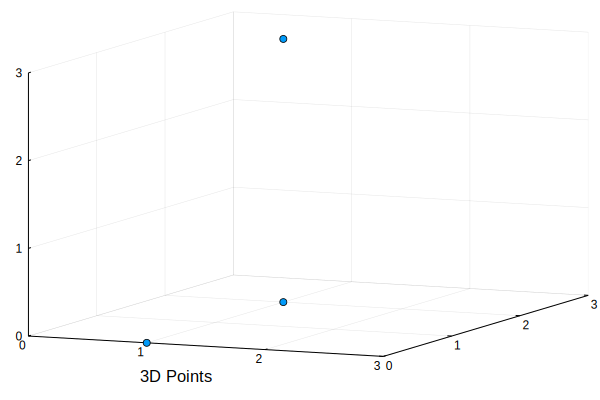

In [15]:
using Plots

x = [getx(p1), getx(p2), getx(p3)]
y = [gety(p1), gety(p2), gety(p3)]
z = [getz(p1), getz(p2), getz(p3)]

plt3d= Plots.plot(
    (x, y, z),
    xlabel = "3D Points",
    label = "",
    xlims = (0,3),
    ylims = (0,3),
    zlims = (0,3),
    seriestype=:scatter)

display(plt3d)